In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!cp /content/drive/My\ Drive/Datasets/DaGuan/TextClassification/new_data.7z ./
!7z x new_data.7z > /null

In [0]:
import pandas as pd

In [0]:
df_train = pd.read_csv('new_data/train_set.csv')

In [8]:
df_train.head()

,id,article,word_seg,class
0,0,7368 1252069 365865 755561 1044285 129532 1053...,816903 597526 520477 1179558 1033823 758724 63...,14
1,1,581131 165432 7368 957317 1197553 570900 33659...,90540 816903 441039 816903 569138 816903 10343...,3
2,2,7368 87936 40494 490286 856005 641588 145611 1...,816903 1012629 957974 1033823 328210 947200 65...,12
3,3,299237 760651 299237 887082 159592 556634 7489...,563568 1239563 680125 780219 782805 1033823 19...,13
4,4,7368 7368 7368 865510 7368 396966 995243 37685...,816903 816903 816903 139132 816903 312320 1103...,12


In [10]:
df_train['word_length'] = df_train['word_seg'].map(lambda x:len(x.split(" ")))
df_train['word_length'].describe()

count    102277.000000
mean        716.954604
std         801.804540
min           6.000000
25%         305.000000
50%         514.000000
75%         862.000000
max       39759.000000
Name: word_length, dtype: float64

In [0]:
word_list = []
for text in df_train['word_seg'].to_list():
    words = text.split(" ")
    word_list += words

In [0]:
from collections import Counter
count_words = pd.Series(Counter(word_list)).sort_values(ascending=False)

In [14]:
print(count_words.head())
print(count_words.count())

520477     5290340
816903     4063036
1033823    3358597
995362     2025883
920327     1028550
dtype: int64
875129


In [15]:
count_words[count_words < 10]

784632     9
750764     9
37479      9
586811     9
332184     9
          ..
869622     1
1115829    1
828947     1
1124063    1
641912     1
Length: 708339, dtype: int64

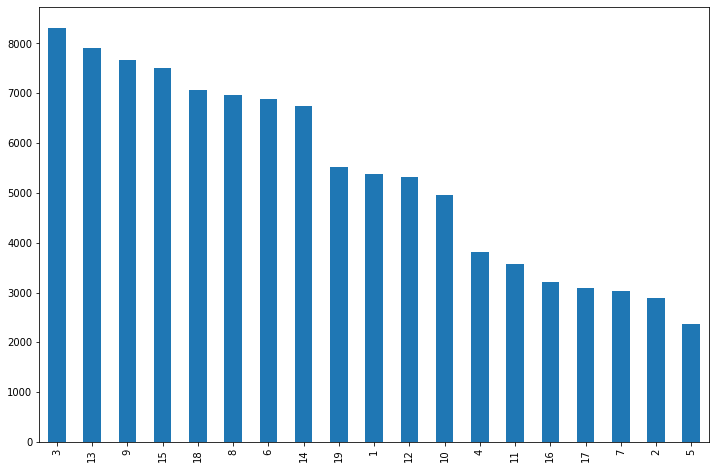

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
count_label = df_train['class'].value_counts().plot(kind='bar')